# Analysis of Drive Incidents 

During the night of 20. - 21.04.2017 it was possible to log two incidents of the drive. 
  
  * The 1st was around 3:45h and was not accompanied by a HardwareWarning state of drivectrl.
  * The 2nd was around 4:58h and this **was** accompanied by a HardwareWarning state of drivectrl.
  
For details see [the logbook entry](https://www.fact-project.org/logbook/showthread.php?tid=5093&pid=24702#pid24702).

The IndraDrive software was running with a trigger setting of "90% torque". Only two incidents were recorded. The software when triggered would readout the data from the IndraDrive but not store it automatically and re-arm the trigger.
So the trigger was armed once in the evening and again once in the morning before shutdown.

The IndraDrive software can output 3 different file formats: 

 * csv-stlye ascii table with ".txt" file extension.
 * xml
 * zip file containing the xml file with ".xmlz" file extension.
 
All 3 formats were used in parallel on the 2 incidents, unfortunately for the 2nd incident both the xml-file and the zipped-xmlz-file did not contain any data, just header information. Luckily the csv-like file was (apparently) okay.

So writers had to be written for both file formats. 

## Realtime timestamps

The sampled data as it comes out of the IndraDrive Software does not contain real time timestamps. It just contains the time with respect to the trigger. So either the time needs to be written by the operating human into the filename or one simply has no idea when the sampled data was recorded. For samples taken without a human present there is not even a guess for the time, the data was taken.

However, the FACT++ drivectrl program logs the position once per second. So by correlating the position sampled by the IndraDrive and the position sampled by the FACT++ program drivectrl it is possible to get a fairly good estimate of the timing of the recorded data.

Apart from the `read_` functions also a function was implemented to assign a best guess for the realtime timestamp to the sampled data.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from glob import glob
from make_multipage_pdf import (
    read_and_prepare_rexroth_file,
    read_and_prepare_pointing_position_file,
    assign_realtime
)

###  Reading in the IndraDrive data and the aux-file; assign realtime timestamps

In [2]:
df1 = read_and_prepare_rexroth_file(
    path='DriveTest20170420/Trigger90PercentTorque.xml')
df2 = read_and_prepare_rexroth_file(
    path='DriveTest20170420/Trigger90PercentTorque_2.txt', 
    sampling_period_in_ms=10
)
aux = read_and_prepare_pointing_position_file(
    path='aux/20170420.DRIVE_CONTROL_POINTING_POSITION.fits')
df1 = assign_realtime(df1, aux)
df2 = assign_realtime(df2, aux)

\newpage

### Show that the realtime timestamps look okay.

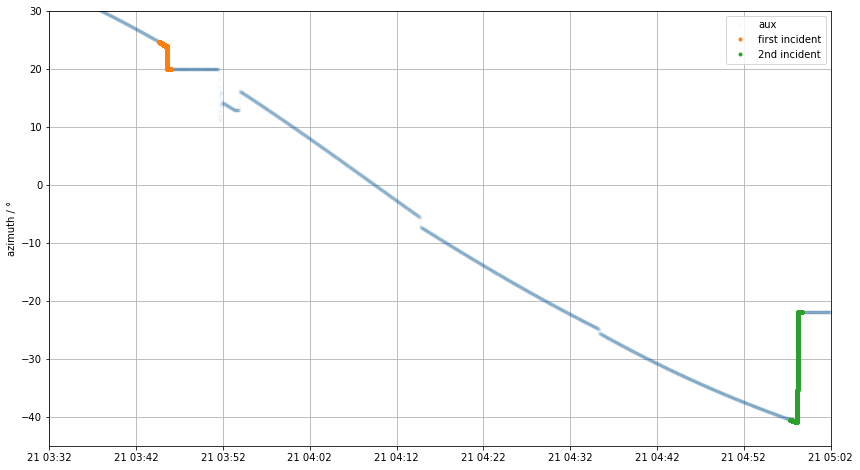

In [3]:
plt.figure(figsize=(14, 8))
plt.plot(aux.Az,'.', label='aux', alpha=0.02)
plt.plot(df1.pos, '.', label='first incident')
plt.plot(df2.pos, '.', label='2nd incident')
plt.legend()
plt.ylim(-45, 30)
plt.ylabel('azimuth / °')
plt.xlim(
    pd.to_datetime("2017.04.21T03:32"),
    pd.to_datetime("2017.04.21T05:02"),
)
plt.grid()

\newpage

### Torque vs. Time

Below I plot the measured torque for both incidents versus the realtime. As one can see, the incidents were too far apart to see any details. So below, both incidents are shown individually.

One cas observe however, that in the first incident the torque value was positive and larger than 200%, while for the 2nd incident it was negative and lower than -200%. So apparently both cases can happen.

One of the many (puzzling) torque limits I've seen was given as **257.3%**.

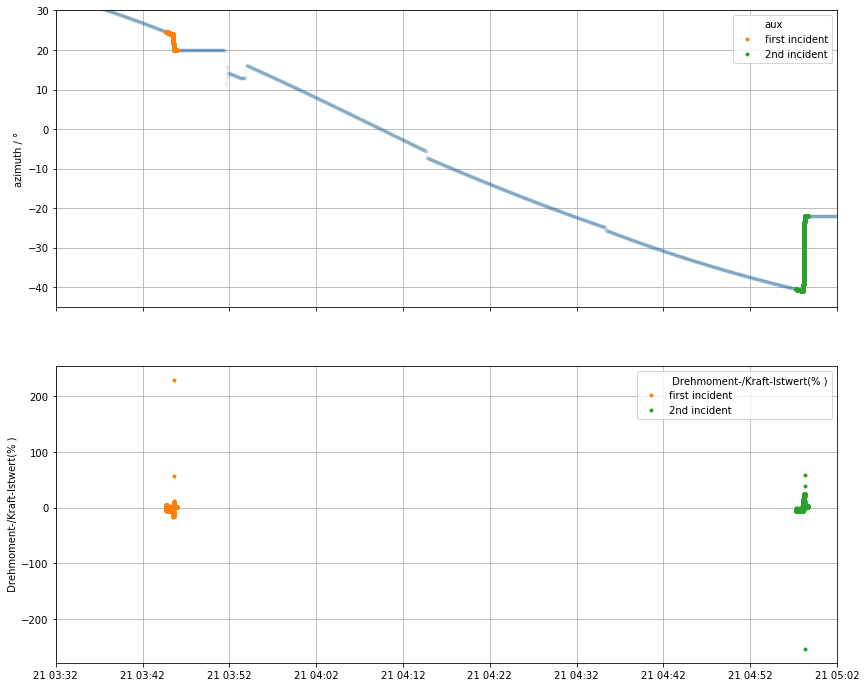

In [4]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 12), sharex=True)
ax1.plot(aux.Az,'.', label='aux', alpha=0.02)
ax1.plot(df1.pos, '.', label='first incident')
ax1.plot(df2.pos, '.', label='2nd incident')
ax1.grid()
ax1.legend()
ax1.set_ylabel('azimuth / °')
ax1.set_ylim(-45, 30)
ax1.set_xlim(
    pd.to_datetime("2017.04.21T03:32"),
    pd.to_datetime("2017.04.21T05:02"),
)

ax2.plot(df1[df1.columns[1]], '.', alpha=0)
ax2.plot(df1[df1.columns[1]], '.', label='first incident')
ax2.plot(df2[df2.columns[1]], '.', label='2nd incident')
ax2.legend()
ax2.set_ylabel(df1.columns[1])
ax2.set_xlim(
    pd.to_datetime("2017.04.21T03:32"),
    pd.to_datetime("2017.04.21T05:02"),
)
ax2.grid()

\newpage

# First incident - 4 channels vs. realtime

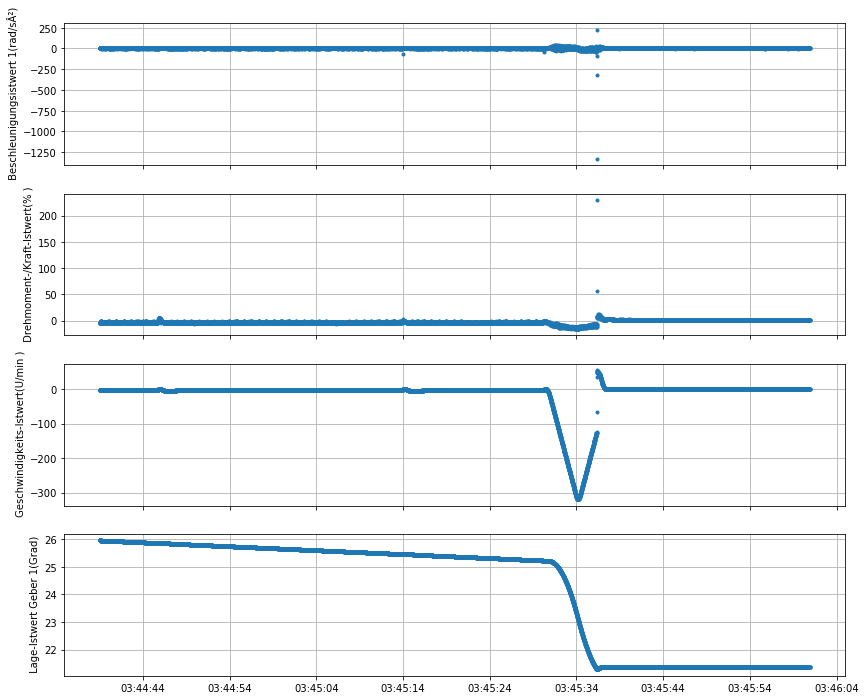

In [5]:
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df1.columns[:len(ax)]):
    ax[i].plot(df1[name], '.', label=name)
    ax[i].set_ylabel(name)
    ax[i].grid()

\newpage

# First incident - zoom to 8sec "around" incident

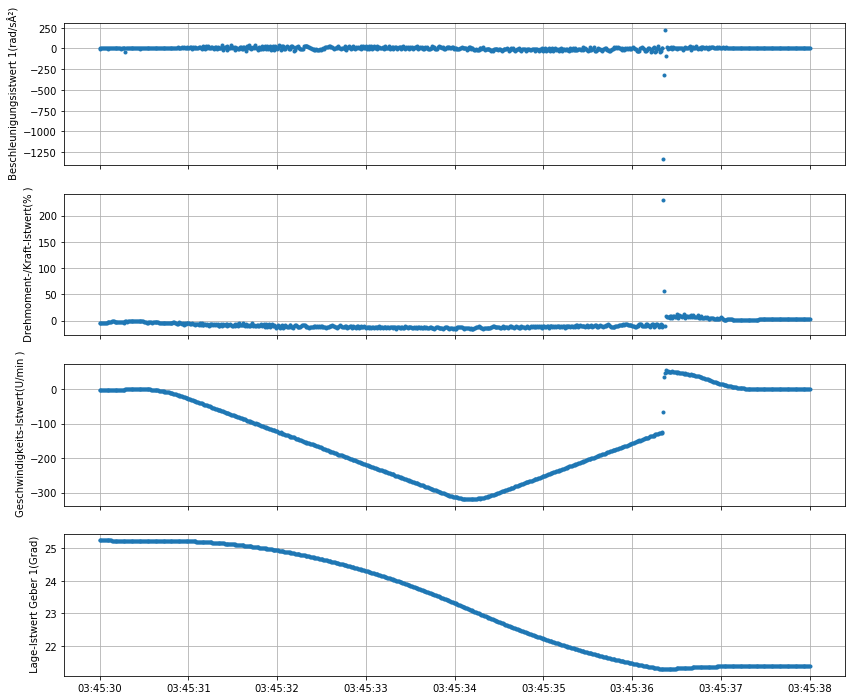

In [6]:
df1_ = df1[pd.to_datetime("2017.04.21T03:45:30"):pd.to_datetime("2017.04.21T03:45:38")]
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df1_.columns[:len(ax)]):
    ax[i].plot(df1_[name], '.', label=name)
    ax[i].set_ylabel(name)
    ax[i].grid()

In [ ]:
\newpage

# First incident - zoom to 8sec "around" incident

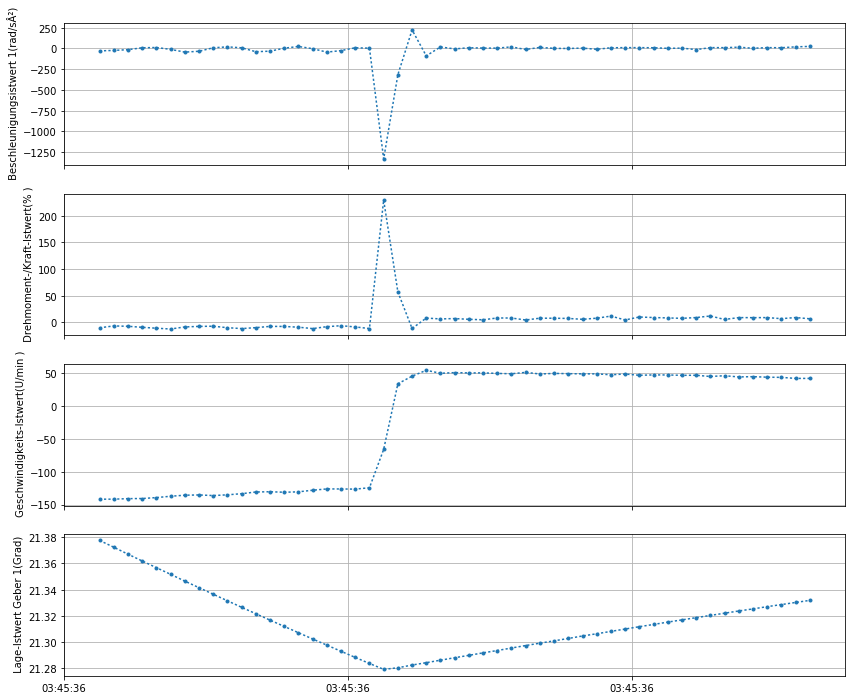

In [14]:
df1_ = df1[pd.to_datetime("2017.04.21T03:45:36.15"):pd.to_datetime("2017.04.21T03:45:36.65")]
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df1_.columns[:len(ax)]):
    ax[i].plot(df1_[name], '.:', label=name)
    ax[i].set_ylabel(name)
    ax[i].grid()

\newpage

# 2nd incident - 4 channels vs. realtime

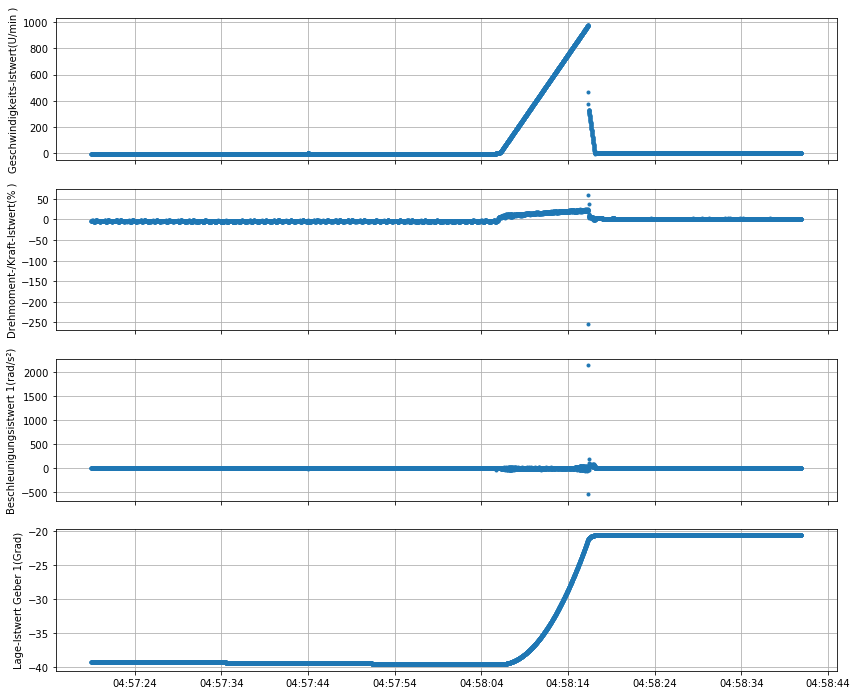

In [7]:
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df2.columns[:len(ax)]):
    ax[i].plot(df2[name], '.', label=name)
    ax[i].set_ylabel(name[41:])
    ax[i].grid()

\newpage 

# 2nd incident - zoom to 14 seconds "around" incident

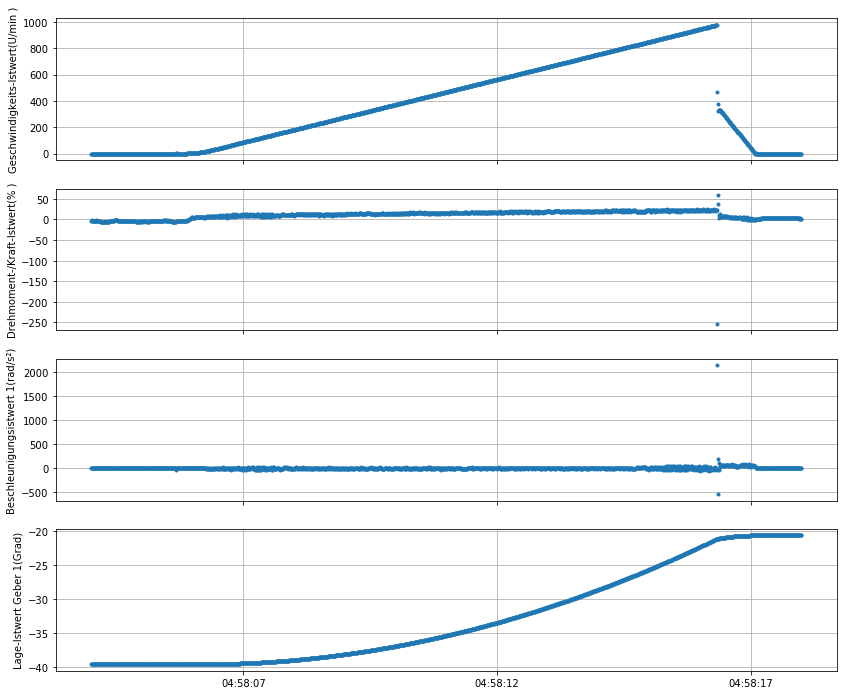

In [8]:
df2_ = df2[pd.to_datetime("2017.04.21T04:58:04"):pd.to_datetime("2017.04.21T04:58:18")]
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df2_.columns[:len(ax)]):
    ax[i].plot(df2_[name], '.', label=name)
    ax[i].set_ylabel(name[41:])
    ax[i].grid()

\newpage 

# 2nd incident - zoom to 0.5s "around" it

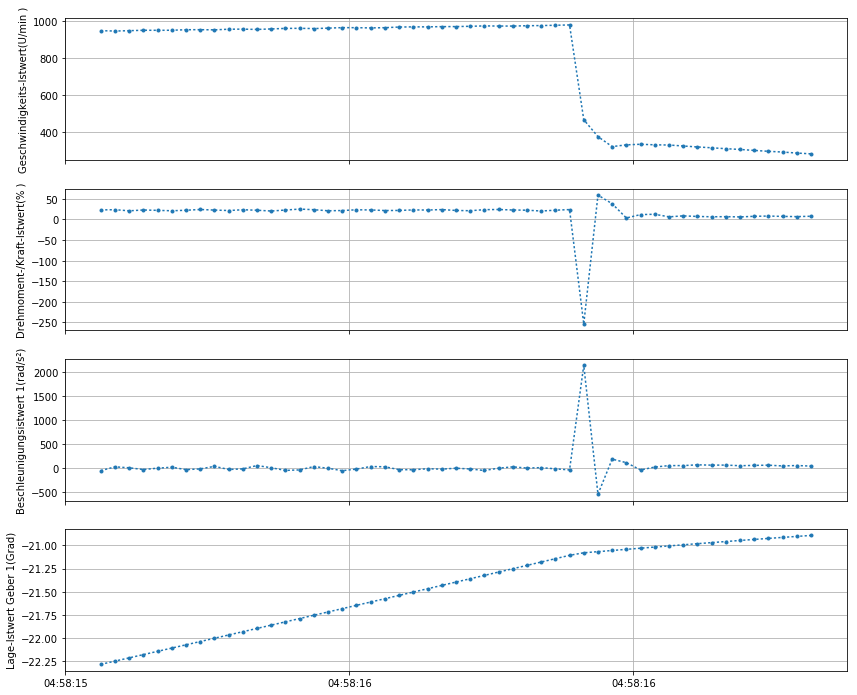

In [9]:
df2_ = df2[pd.to_datetime("2017.04.21T04:58:16"):pd.to_datetime("2017.04.21T04:58:16.5")]
fig, ax = plt.subplots(4, figsize=(14, 12), sharex=True)
for i, name in enumerate(df2_.columns[:len(ax)]):
    ax[i].plot(df2_[name], '.:', label=name)
    ax[i].set_ylabel(name[41:])
    ax[i].grid()